# 4장 분류

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'hojunnn'
os.environ['KAGGLE_KEY'] = 'd4271b12660538c66718e87a2c67b22b'

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|1         | 1.00M/66.0M [00:00<00:38, 1.75MB/s]
  5%|4         | 3.00M/66.0M [00:00<00:12, 5.08MB/s]
  9%|9         | 6.00M/66.0M [00:00<00:06, 10.4MB/s]
 17%|#6        | 11.0M/66.0M [00:00<00:03, 19.0MB/s]
 23%|##2       | 15.0M/66.0M [00:01<00:02, 24.3MB/s]
 29%|##8       | 19.0M/66.0M [00:01<00:01, 25.5MB/s]
 35%|###4      | 23.0M/66.0M [00:01<00:01, 28.8MB/s]
 41%|####      | 27.0M/66.0M [00:01<00:01, 31.3MB/s]
 49%|####8     | 32.0M/66.0M [00:01<00:01, 35.2MB/s]
 56%|#####6    | 37.0M/66.0M [00:01<00:00, 36.9MB/s]
 64%|######3   | 42.0M/66.0M [00:01<00:00, 39.1MB/s]
 71%|#######1  | 47.0M/66.0M [00:01<00:00, 41.2MB/s]
 79%|#######8  | 52.0M/66.0M [00:02<00:00, 40.6MB/s]
 85%|########4 | 56.0M/66.0M [00:02<00:00, 37.1MB/s]
 91%|######### | 60.0M/66.0M [00:02<00:00, 37.5MB/s]
 97%|#########7| 64.0M/66.0M [00:02<00:00, 38.0MB/s]
100%|##########| 66.0M/66.0M [00:02<00:00, 28.1MB/s]



License(s): DbCL-1.0



In [6]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1499-BAB9

 C:\Users\705-8\2-0 파이썬 머신러닝 완벽 가이드 디렉터리

2024-08-01  오후 02:46    <DIR>          .
2024-08-01  오후 02:46    <DIR>          ..
2024-08-01  오후 02:38    <DIR>          .ipynb_checkpoints
2024-07-25  오후 05:37            22,835 1장 파이썬 기반의 머신러닝 생태계 이해.ipynb
2024-07-29  오후 02:16           187,932 2장 사이킷런으로 시작하는 머신러닝.ipynb
2024-08-01  오전 09:07           213,483 3장 평가.ipynb
2024-07-31  오후 05:39           416,069 4장 분류 part 2.ipynb
2024-08-01  오후 01:20           118,492 4장 분류 part1.ipynb
2024-08-01  오후 02:46             1,135 4장 분류 part3.ipynb
2019-09-20  오전 12:05        69,155,672 creditcardfraud.zip
2024-08-01  오후 01:16            93,942 KNN, 서포트 벡터 머신.ipynb
2019-12-11  오전 03:52           626,900 sample_submission.csv
2019-12-11  오전 03:52         8,646,304 santander-customer-satisfaction.zip
2019-12-11  오후 10:01       262,272,082 santander-customer-transaction-prediction.zip
2019-12-11  오전 03:52        59,054,007 test.csv
2019-12-11  오전 03:52       

In [12]:
!tar -xf creditcardfraud.zip

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [18]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
# mean 은 스케일링, 결제 금액도 스케일링 진행해줘도 될거같음

In [26]:
card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

def get_preprocessing_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1, inplace=True)
    return df_copy

In [81]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):

    df_copy = get_preprocessing_df(df)

    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test

In [83]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [87]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] *100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
import time

def get_clf_eval(y_test , pred): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred)
    print ('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도 : {0: .4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f},\
          F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision, recall, f1, roc_auc))

In [93]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    start_time = time.time()
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)
    print("수행 시간:{0:.1f} 초 ".format(time.time() - start_time))

In [99]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter =1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85280    15]
 [   57    91]]
정확도 :  0.9992, 정밀도 : 0.8585, 재현율 : 0.6149,          F1:0.7165, AUC:0.8073
수행 시간:4.6 초 


In [101]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                          n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도 :  0.9995, 정밀도 : 0.9573, 재현율 : 0.7568,          F1:0.8453, AUC:0.8783
수행 시간:3.5 초 


In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
                        
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   41   107]]
정확도 :  0.9995, 정밀도 : 0.9554, 재현율 : 0.7230,          F1:0.8231, AUC:0.8615
수행 시간:184.3 초 


# 데이터 분포도 변환 후 모델 학습/예측/평가

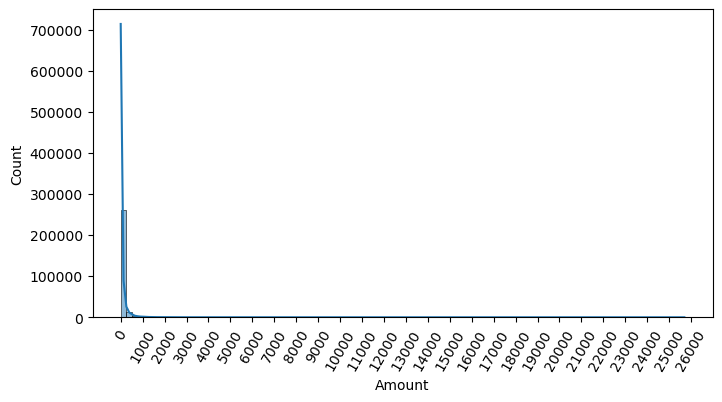

In [112]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [118]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

    df_copy.insert(0, 'Amount_scaled', amount_n)

    df_copy.drop(['Time','Amount'],axis =1, inplace=True)
    return df_copy

In [120]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [122]:

print('\n### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter =1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                          n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

print('\n### RandomForest 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
                        
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   57    91]]
정확도 :  0.9992, 정밀도 : 0.8585, 재현율 : 0.6149,          F1:0.7165, AUC:0.8073
수행 시간:4.7 초 

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   36   112]]
정확도 :  0.9995, 정밀도 : 0.9573, 재현율 : 0.7568,          F1:0.8453, AUC:0.8783
수행 시간:3.2 초 

### RandomForest 예측 성능 ###
오차 행렬
[[85289     6]
 [   40   108]]
정확도 :  0.9995, 정밀도 : 0.9474, 재현율 : 0.7297,          F1:0.8244, AUC:0.8648
수행 시간:182.7 초 


<Axes: >

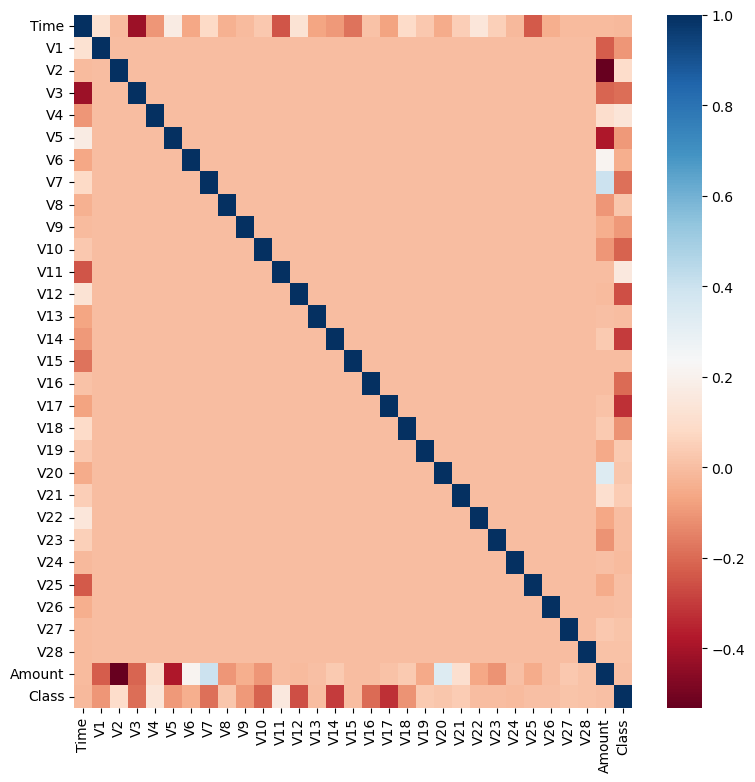

In [124]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [158]:
import numpy as np

def get_outlier(df=None, column=None, weight = 1.5):

    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75= np.percentile(fraud.values, 75)

    iqr = quantile_75-quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [160]:
outlier_index = get_outlier(df=card_df, column='V14',weight = 1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [162]:
outlier_index = get_outlier(df=card_df, column='V17')
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([], dtype='int64')


In [164]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

    df_copy.insert(0, 'Amount_scaled', amount_n)

    df_copy.drop(['Time','Amount'],axis =1, inplace=True)

    outlier_index = get_outlier(df=card_df, column='V14', weight = 1.5)
    df_copy.drop (outlier_index, axis=0, inplace = True)

    return df_copy

In [166]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [168]:

print('\n### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter =900)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                          n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

print('\n### RandomForest 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
                        
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   57    91]]
정확도 :  0.9992, 정밀도 : 0.8585, 재현율 : 0.6149,          F1:0.7165, AUC:0.8073
수행 시간:4.6 초 

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   36   112]]
정확도 :  0.9995, 정밀도 : 0.9573, 재현율 : 0.7568,          F1:0.8453, AUC:0.8783
수행 시간:3.2 초 

### RandomForest 예측 성능 ###
오차 행렬
[[85290     5]
 [   39   109]]
정확도 :  0.9995, 정밀도 : 0.9561, 재현율 : 0.7365,          F1:0.8321, AUC:0.8682
수행 시간:183.4 초 


## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [179]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape,
      y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [178]:

print('\n### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter =900)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                          n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

print('\n### RandomForest 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
                        
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   57    91]]
정확도 :  0.9992, 정밀도 : 0.8585, 재현율 : 0.6149,          F1:0.7165, AUC:0.8073
수행 시간:4.6 초 

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   36   112]]
정확도 :  0.9995, 정밀도 : 0.9573, 재현율 : 0.7568,          F1:0.8453, AUC:0.8783
수행 시간:3.2 초 

### RandomForest 예측 성능 ###
오차 행렬
[[85289     6]
 [   39   109]]
정확도 :  0.9995, 정밀도 : 0.9478, 재현율 : 0.7365,          F1:0.8289, AUC:0.8682
수행 시간:181.5 초 


C:\Users\705-8\AppData\Local\Temp\ipykernel_8764\5456443.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top20, y=ftr_top20.index,palette='Set1')


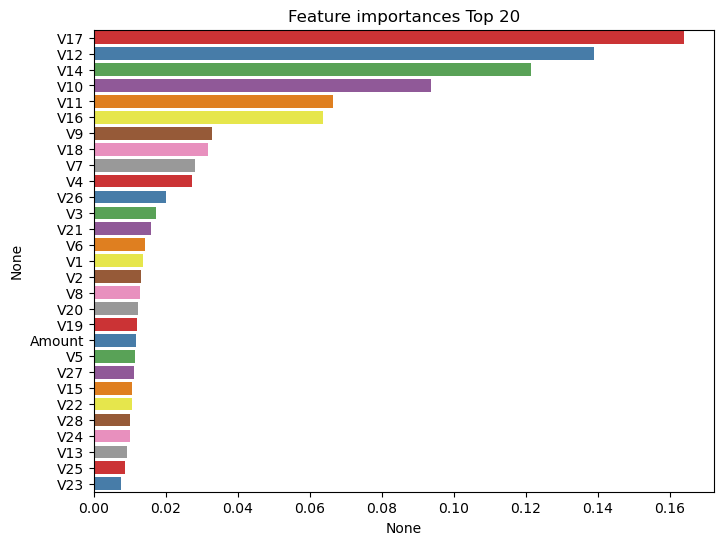

In [196]:

import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index,palette='Set1')
plt.show()

C:\Users\705-8\AppData\Local\Temp\ipykernel_8764\3549766708.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top20, y=ftr_top20.index,palette='Set1')


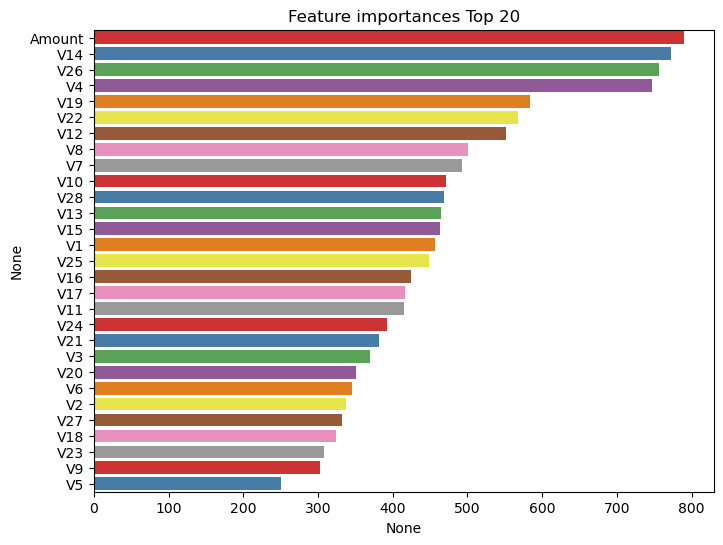

In [198]:

import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index,palette='Set1')
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index,palette='Set1')
plt.show()